# ETCBC BHSA 데이터를 이용한 구문 트리 시각화

In [1]:
from tf.app import use

In [2]:
from utils import structure, layout

from graphviz import Digraph
from nltk import Tree
from IPython.display import display

In [3]:
A = use("etcbc/bhsa", mod="etcbc/trees/tf,etcbc/bridging/tf", hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots/node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


## tf 포맷으로 되어 있는 데이터를 불러와서 시각화 패키지를 통해 다양한 방식으로 시각화

In [4]:
passage = ("Genesis", 1, 1)
passageStr = "{} {}:{}".format(*passage)
verse = T.nodeFromSection(passage)
sentence = L.d(verse, otype="sentence")[0]
firstSlot = L.d(sentence, otype="word")[0]
stringTree = F.tree.v(sentence)
rawTree = F.tree.v(sentence)
# print(f"{passageStr} - first word = {firstSlot}\n\ntree =\n{stringTree}")
stringTree

'(S(C(PP(pp 0)(n 1))(VP(vb 2))(NP(n 3))(PP(U(pp 4)(dt 5)(n 6))(cj 7)(U(pp 8)(dt 9)(n 10)))))'

In [5]:
import re

# 정규식을 사용하여 문자열에서 숫자 추출
nums = re.findall(r'\d+', stringTree)

# 추출된 숫자를 대체하려는 위치에 대응하는 리스트의 값으로 대체
for i, num in enumerate(nums):
    stringTree = stringTree.replace(num, str(F.g_word_utf8.v(int(num)+1)))

print(stringTree)

(S(C(PP(pp בְּ)(n רֵאשִׁ֖ית))(VP(vb בָּרָ֣א))(NP(n אֱלֹהִ֑ים))(PP(U(pp אֵ֥ת)(dt הַ)(n שָּׁמַ֖יִם))(cj וְ)(U(pp אֵ֥ת)(dt הָ)(n רֵאשִׁ֖יתבְּ)))))


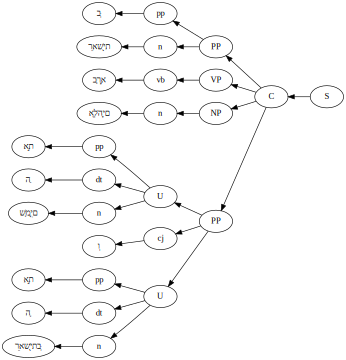

In [6]:
def build_tree_graph(tree, graph=None, node_id=0):
    if graph is None:
        graph = Digraph()
        
    label = str(tree.label())
    graph.node(str(node_id), label=label)
    
    child_id = node_id + 1
    for child in tree:
        if isinstance(child, str):
            graph.node(str(child_id), label=child)
            graph.edge(str(node_id), str(child_id))
            child_id += 1
        else:
            graph.edge(str(node_id), str(child_id))
            child_id = build_tree_graph(child, graph, child_id)
            
    return child_id

# nltk Tree 객체 생성
nltk_tree = Tree.fromstring(stringTree)

# Graphviz 객체 생성 및 트리 구성
graph = Digraph(graph_attr={'rankdir': 'RL', 'size': '5,5', 'ratio': 'compress'})
build_tree_graph(nltk_tree, graph)


# 이미지를 주피터 노트북에 표시
display(graph)

In [7]:
# nltk Tree 객체 생성
nltk_tree = Tree.fromstring(stringTree)

# 시각화
nltk_tree.pretty_print()

                                          S                                      
                                          |                                       
                                          C                                      
      ____________________________________|______________                         
     |               |        |                          PP                      
     |               |        |            ______________|________                
     PP              VP       NP          U              |        U              
  ___|______         |        |       ____|______        |    ____|_______        
 pp         n        vb       n      pp   dt     n       cj  pp   dt      n      
 |          |        |        |      |    |      |       |   |    |       |       
בְּ     רֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת  הַ שָּׁמַ֖יִם  וְ אֵ֥ת  הָ רֵאשִׁ֖יתבְּ



In [8]:
tree = structure(rawTree)
tree

['S',
 ['C',
  ['PP', [('pp', 0)], [('n', 1)]],
  ['VP', [('vb', 2)]],
  ['NP', [('n', 3)]],
  ['PP',
   ['U', [('pp', 4)], [('dt', 5)], [('n', 6)]],
   [('cj', 7)],
   ['U', [('pp', 8)], [('dt', 9)], [('n', 10)]]]]]

In [9]:
layoutTree = layout(tree, firstSlot, F.g_word_utf8.v)
print(layoutTree)

  S
    C
      PP
        pp בְּ
        n רֵאשִׁ֖ית
      VP
        vb בָּרָ֣א
      NP
        n אֱלֹהִ֑ים
      PP
        U
          pp אֵ֥ת
          dt הַ
          n שָּׁמַ֖יִם
        cj וְ
        U
          pp אֵ֥ת
          dt הָ
          n אָֽרֶץ
